In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset2.csv')
dataset.head()

,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,Result
0,1,-1,-1,-1,0,1,1,1,1,-1
1,-1,-1,1,1,0,1,1,1,1,-1
2,-1,-1,-1,-1,0,1,1,1,1,-1
3,0,-1,1,1,0,1,1,1,1,-1
4,0,-1,1,1,0,-1,1,-1,1,1


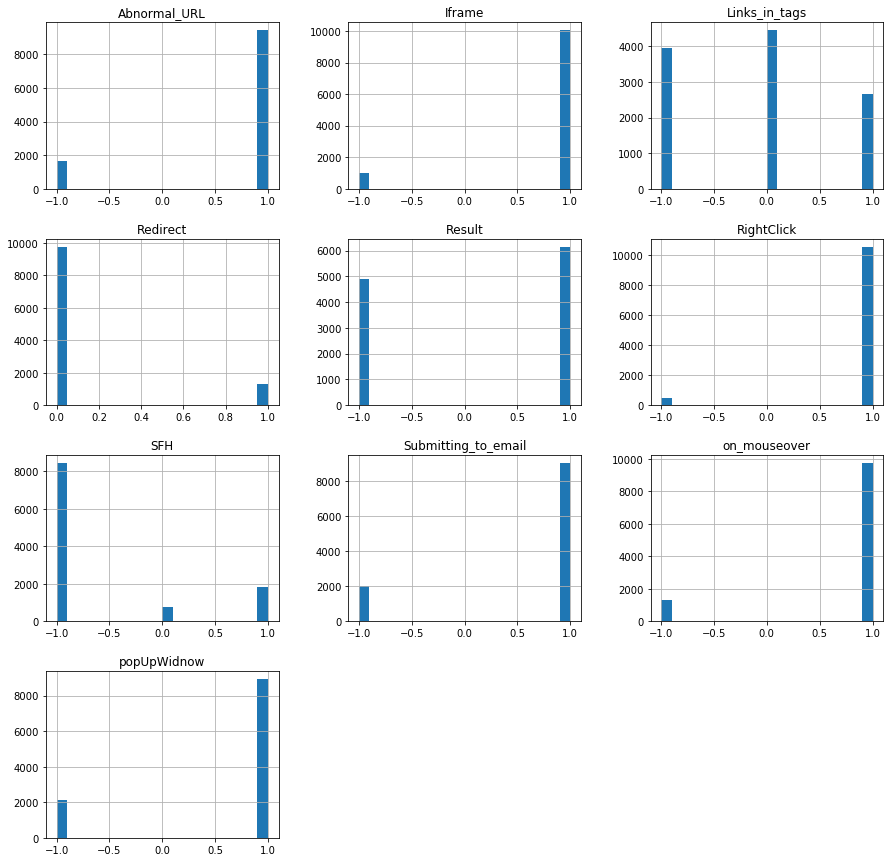

In [2]:
#Plotting the data distribution
dataset.hist(bins = 20,figsize = (15,15))
plt.show()

In [3]:
df1 = dataset[['Submitting_to_email','Result']]
df1.head()

,Submitting_to_email,Result
0,-1,-1
1,1,-1
2,-1,-1
3,1,-1
4,1,1


In [4]:
#crosstab to check the website status and page rank.
# to get a better vissualization we will round off the values into nearest 10
# df1_new = df1.copy()

# df1_new.links_in_tags = df1.links_in_tags.round(-1)

cross_tab = pd.crosstab(df1['Submitting_to_email'],df1['Result']).T
cross_tab

Submitting_to_email,-1,1
Result,,
-1,931,3967
1,1083,5074


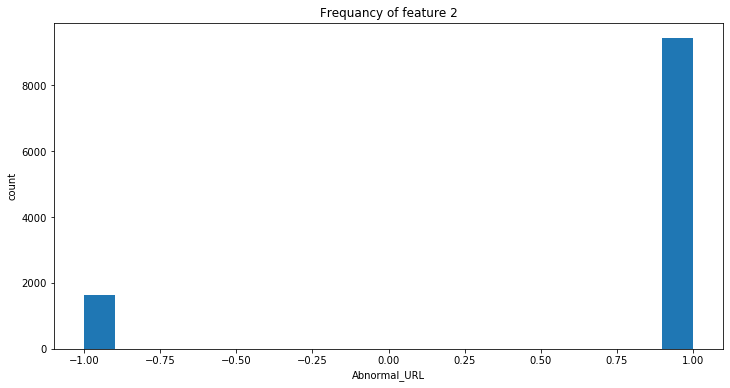

In [9]:
#Let's plot and check the frequency of links_in_tags feature

plt.figure(figsize=(12,6))  
plt.hist(df1['Abnormal_URL'], bins=20)   
plt.title('Frequancy of feature 2')
plt.xlabel('Abnormal_URL')       
plt.ylabel('count')       
plt.show()

In [11]:
#H0 : website status is independent of feature2
#H1 : website status depends on feature2
#Alpha : 0.05
from scipy.stats import chi2_contingency #import chi2_contigency for chi2␣ independency test

alpha = 0.05

stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross_tab)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value is {p_value}\n Website status is Independent of feature2')
else:
  print(f' Reject Null Hypothesis\n P-Value is {p_value}\n Website status depends on feature2')

 Reject Null Hypothesis
 P-Value is 2.4070509148691845e-10
 Website status depends on feature2


In [12]:
phishing_df2 = df1[df1['Result']==-1]  #store all the phishing websites in a phishing
legitimate_df2 = df1[df1['Result']==1]  #store all the legitimate websites in a legitimate
phishing_df2.head()

,Abnormal_URL,Result
0,-1,-1
1,1,-1
2,-1,-1
3,1,-1
6,-1,-1


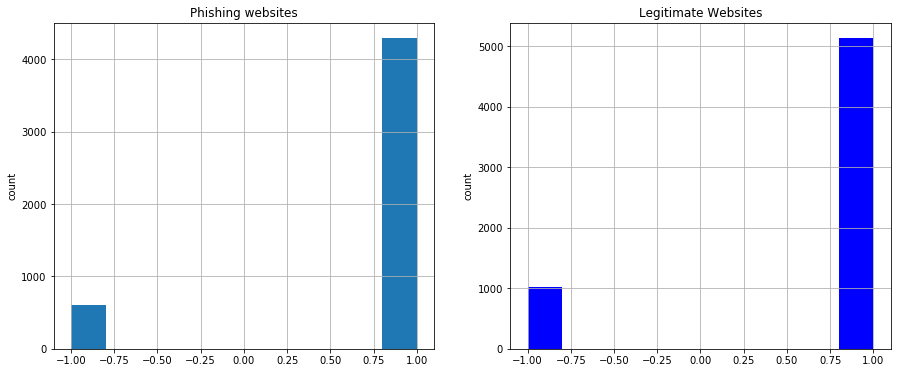

In [14]:
#plot different histograms for phishing and legitmate websites
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

phishing_df2['Abnormal_URL'].hist(ax=ax1)
ax1.set_title('Phishing websites')
ax1.set_ylabel('count')

legitimate_df2['Abnormal_URL'].hist(ax=ax2,color='blue')
ax2.set_title('Legitimate Websites')
ax2.set_ylabel('count')

plt.show()